# Interactively playing with MNIST!
## https://ricardodeazambuja.com/

I really like to be the person that tries to automate things, even when they don't pay off in the very short term because it's fun and you always learn something new. So I'm republishing the image below straight from the place it seems to be [it's first appearance](https://i.imgur.com/Q8kV8.png):

<img src="https://i.imgur.com/Q8kV8.png" width="600"/>

In [1]:
import tensorflow as tf

Keras has some famouse datasets that you can import very easily. Below I'm showing a list with all names:

In [2]:
[i for i in dir(tf.keras.datasets) if '__' not in i]

['boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

Now I will list the useful methods available for each dataset:

In [3]:
[[(i,j) for j in dir(getattr(tf.keras.datasets,i)) if '__' not in j] 
                                         for i in dir(tf.keras.datasets) if '__' not in i]

[[('boston_housing', 'load_data')],
 [('cifar10', 'load_data')],
 [('cifar100', 'load_data')],
 [('fashion_mnist', 'load_data')],
 [('imdb', 'get_word_index'), ('imdb', 'load_data')],
 [('mnist', 'load_data')],
 [('reuters', 'get_word_index'), ('reuters', 'load_data')]]

The load_data method is quite obvious, but I had to check what [get_word_index](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/get_word_index) was about.

I'm interested in the MNIST numbers, so let's load it.

In [4]:
mnist = tf.keras.datasets.mnist

# download the dataset
# mnist.load_data already splits train/test for us
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
# verify the range and type of the original data
x_train.min(),x_train.max(), x_train.dtype

(0, 255, dtype('uint8'))

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# now rescaled to be from 0.0 to 1.0 (float64)
x_train.min(),x_train.max(), x_train.dtype

(0.0, 1.0, dtype('float64'))

Now, I will reuse the very first example from [Tensorflow tutorials](https://www.tensorflow.org/tutorials) (Feb/2019). This example is interesting because it's NOT using convolutional layers and that will be useful to see the differences later on.

The example is simple, but not totally super duper old school. It uses as activation the [RELU](https://github.com/Kulbear/deep-learning-nano-foundation/wiki/ReLU-and-Softmax-Activation-Functions) and a [Dropout](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) layer... I didn't know it was patented by Google in 2012.

This model is also smarter than old ones in respect to its input because it uses a `Flatten` layer as its first, so you can use your 28x28 values (pixels) matrix and it is transformed into an array with 784 values.

In [7]:
# Size of the flattened input:
x_train.shape[1]*x_train.shape[2]

784

When we need to know more about a method, object, etc (e.g tf.keras.layers.Flatten), you can move the cursor over the word and press ```Shift+Tab``` or write: 

In [8]:
tf.keras.layers.Flatten?

by the way, ?? will show you the source code instead of docstring ;)

or the python interpreter way that prints it directly instead of creating the extra window:

In [9]:
help(tf.keras.layers.Flatten)

Help on class Flatten in module tensorflow.python.keras.layers.core:

class Flatten(tensorflow.python.keras.engine.base_layer.Layer)
 |  Flatten(data_format=None, **kwargs)
 |  
 |  Flattens the input. Does not affect the batch size.
 |  
 |  If inputs are shaped `(batch,)` without a channel dimension, then flattening
 |  adds an extra channel dimension and output shapes are `(batch, 1)`.
 |  
 |  Arguments:
 |      data_format: A string,
 |          one of `channels_last` (default) or `channels_first`.
 |          The ordering of the dimensions in the inputs.
 |          `channels_last` corresponds to inputs with shape
 |          `(batch, ..., channels)` while `channels_first` corresponds to
 |          inputs with shape `(batch, channels, ...)`.
 |          It defaults to the `image_data_format` value found in your
 |          Keras config file at `~/.keras/keras.json`.
 |          If you never set it, then it will be "channels_last".
 |  
 |  Example:
 |  
 |  ```python
 |      mod

Now it's time to create the model. I will keep the sequential method, but it's also possible to use .add (e.g. model.add()) instead of passing all layers as a list:

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten1'),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, name='Dense1'),
  tf.keras.layers.Dropout(0.2, name='Dropout1'),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='Dense2')
])


https://github.com/tensorflow/tensorflow/blob/r1.11/tensorflow/python/keras/backend.py#L3546

And compile the beast!

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

Let's train it:

In [14]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2202 - acc: 0.9352
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0971 - acc: 0.9706
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0700 - acc: 0.9777
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0549 - acc: 0.9829
Epoch 5/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0438 - acc: 0.9853


And, last but not least, verify how it works on the never seen before test data:

In [15]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0650 - acc: 0.9807


[0.06496644636945566, 0.9807]

In [16]:
x_test.shape

(10000, 28, 28)

Below is a function that will run the prediction and, after that, show the results using matplotlib:

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def predict_from_image(input_img):
    get_ipython().magic('matplotlib inline')
    
    prediction = model.predict(input_img.reshape((1,28,28)))[0]

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(input_img, cmap='gray')
    ax1.set_aspect(1.0)

    ax2 = fig.add_subplot(1,2,2)
    _ = ax2.bar(range(10), prediction*10, alpha=0.8, color='b')
    ax2.set_xticks(np.arange(10))
    ax2.set_xticklabels(range(10))
    ax2.set_title("Prediction Probability")

    ax2.set_yticks(range(0, 11))
    ax2.set_yticklabels([str(ri)+'%' for ri in range(0, 110, 10)])
    ax2.set_aspect(1.0)

    plt.tight_layout()
    plt.show()

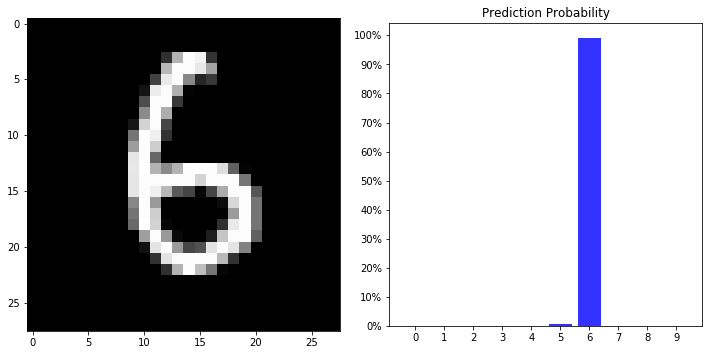

In [18]:
n = 21 #it can go from 0 to 9999
predict_from_image(x_test[n])

## Finally this is the part that will allow us to test digits we draw directly on the screen!!

In [23]:
#
# Interactive Matplotlib plot
#
# Based on https://matplotlib.org/users/event_handling.html
#
# Sadly, this will not work on Google Colab :(

# import sys

# if "pyplot" in sys.modules:
#     from importlib import reload
#     plt = reload(plt)
# else:
#     from matplotlib import pyplot as plt

%matplotlib inline
from matplotlib import pyplot as plt
# import matplotlib
# from importlib import reload
    
from matplotlib.widgets import Button, Slider
import numpy as np

import io
import PIL.Image

class CaptureHandwriting:
    def __init__(self):
        # if it's called only once, it fails sometimes on my computer...
        # if I don't call inline before calling notebook, it behaves weirdly
        # e.g. figsize gives me a different size ?!?!
        get_ipython().magic('matplotlib inline')
        get_ipython().magic('matplotlib notebook')
        get_ipython().magic('matplotlib notebook') # the third time's a charm!

        self.img_in = []
        self.img_array = []
        self.mouse_captured = False
        
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)
        plt.subplots_adjust(bottom=0.2)

        canvas = ax.figure.canvas
        ax.set_title('Click to draw your number from 0 to 9')

        ax.set_xticks([])
        ax.set_xlim(0,1)

        ax.set_yticks([])
        ax.set_ylim(0,1)

        ax.set_aspect(1.0)

        init_line_width = 20

        self.line, = ax.plot([0], [0], linewidth=init_line_width, linestyle='solid', color='black')  # empty line

        # save the clean slate background -- everything but the animated line
        # is drawn and saved in the pixel buffer background
        self.background = canvas.copy_from_bbox(ax.bbox)
        
        self.xs = list(self.line.get_xdata())
        self.ys = list(self.line.get_ydata())
        
        event_clickDown = self.line.figure.canvas.mpl_connect('button_press_event', self.onclickDown)
        event_clickUp = self.line.figure.canvas.mpl_connect('button_release_event', self.onclickUp)
        cid = self.line.figure.canvas.mpl_connect('motion_notify_event', self)
        
        # http://www.math.buffalo.edu/~badzioch/MTH337/PT/PT-matplotlib_subplots/\
        # PT-matplotlib_subplots.html#axes-objects
        # ax1 = plt.axes([
        #         0.1,      # x-coordinate of the lower left corner of the axes object
        #         0.1,      # y-coordinate of the lower left corner of the axes object
        #         0.5,      # width of the object
        #         0.4       # height of the object
        #                ])

        axsave = plt.axes([ax.get_position().bounds[0], 0.12, ax.get_position().bounds[2], 0.07])
        self.b_save = Button(axsave, 'Convert to MNIST style')
        self.b_save.on_clicked(self.button_update)

        axwidth = plt.axes([ax.get_position().bounds[0], 0.06, ax.get_position().bounds[2], 0.05])
        self.s_width = Slider(axwidth, 'Line Width',5, 50, valinit=init_line_width)
        self.s_width.on_changed(self.slider_update)
        
        self.ax = ax
        self.fig = fig        

        plt.show()

    def __call__(self, event):
        if self.mouse_captured:
            if event.inaxes!=self.line.axes: return
            self.xs.append(event.xdata)
            self.ys.append(event.ydata)
            self.line.set_data(self.xs, self.ys)

            canvas = self.line.figure.canvas
            axes = self.line.axes
            
            # restore the background region
            canvas.restore_region(self.background)

            # redraw just the current rectangle
            axes.draw_artist(self.line)

            # blit just the redrawn area
            canvas.blit(axes.bbox)

            
    def onclickDown(self, event): 
        self.mouse_captured = True
        self.xs = []
        self.ys = []
                        
    def onclickUp(self, event):
        self.mouse_captured = False

    def button_update(self, event):
        f = io.BytesIO()

        self.ax.axis('off')
        extent = self.ax.get_window_extent().transformed(self.fig.dpi_scale_trans.inverted())
        self.fig.savefig(f, dpi='figure', transparent=False, pad_inches=0, bbox_inches=extent)

        img_in = PIL.Image.open(f)
        img_in = img_in.resize((28,28),PIL.Image.BICUBIC)
        img_in = img_in.convert("L")
        self.img_array = -(np.array(img_in)-255)/255.0

        self.ax.axis('on');
        
        self.ax.imshow(self.img_array, cmap='gray')
        self.ax.set_xlim(0,27)
        self.ax.set_ylim(0,27)
        self.ax.invert_yaxis()
        self.ax.figure.canvas.draw()
        plt.pause(0.0001)
        #self.ax.figure.canvas.draw_idle()
        
        plt.close(self.fig)

    def slider_update(self, val):
        self.line.set_linewidth(val)

Ok, I still need to debug it better because sometimes it needs to called many times until it actually works. It's something related to matplolib backend switching. Apparently, if you start with inline it has a hard time to switch to notebook (or the other way around).

<IPython.core.display.Javascript object>


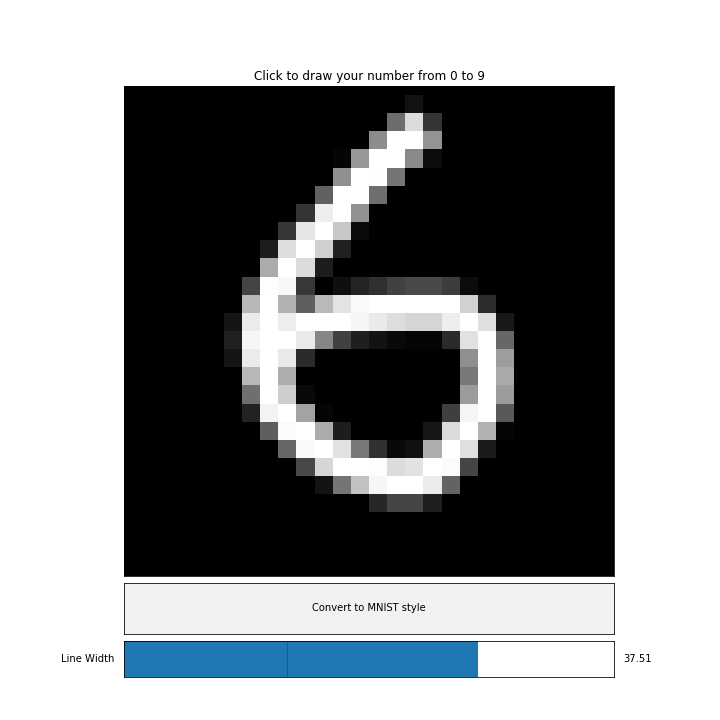

In [36]:
captured = CaptureHandwriting()

My experience shows the network is very good at predicting digits, iff the line width above is set somewhere above 35.

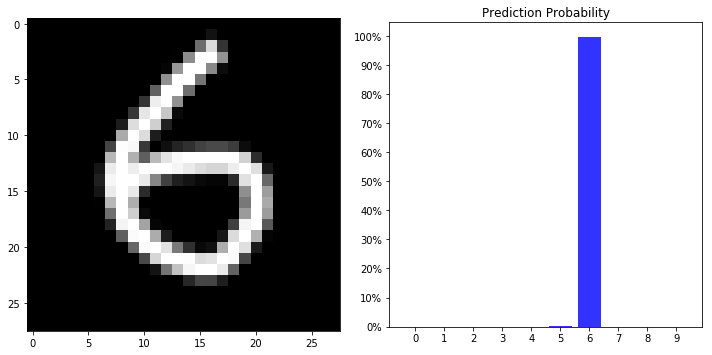

In [37]:
predict_from_image(captured.img_array)